> ### Project Name: Offline Handwriting Recognition using Deep Larning
  ### Author Name: Chetan Malhotra, 14SCSE101072

# Multi-Layer Perceptron Feed Forward Neural Ntwork implemented using TensorFlow for handwritten digit recognition

## What is TensorFlow?

According to TensorFlow's official website, “TensorFlow is an open source software library for numerical computation using dataflow graphs. Nodes in the graph represents mathematical operations, while graph edges represent multi-dimensional data arrays (aka tensors) communicated between them. The flexible architecture allows us to deploy computation to one or more CPUs or GPUs in a desktop, server, or mobile device with a single API.”

![tensorflow](images/tensors_flowing-3.gif)

It’s easy to classify TensorFlow as a neural network library, but it’s not just that. Yes, it was designed to be a powerful neural network library. But it has the power to do much more than that. We can build other machine learning algorithms on it such as decision trees or k-Nearest Neighbors. We can literally do everything we normally would do in numpy! It’s aptly called “numpy on steroids” by the open-source community

##### The advantages of using TensorFlow are:

1. It has an intuitive construct, because as the name suggests it has “flow of tensors”. 
2. we can easily visualize each and every part of the graph.
3. Easily train on cpu/gpu for distributed computing
4. Platform flexibility. We can run the models wherever we want, whether it is on mobile, server or PC.

### The usual workflow of running a program in TensorFlow is as follows:

1. Build a computational graph, this can be any mathematical operation TensorFlow supports.
2. Initialize variables, to compile the variables defined previously
3. Create session, this is where we start implementing the model or algorithm
4. Run graph in session: the compiled graph is passed to the session, which starts its execution. 
5. Close session

### Before starting, few terminologies for tensorflow:

* Placeholder-A way to feed data into the graphs
* feed_dict-A dictionary to pass numeric values to computational graph

Just to get acquainted I am gonna write a program using tensorflow to add two numbers

In [8]:
#importing tensorflow
import tensorflow as tf

#buiding a computational graph
a=tf.placeholder(tf.int16)
b=tf.placeholder(tf.int16)

sum = tf.add(a,b)

#initializing variables
init = tf.global_variables_initializer()

#starting the session and running the graph 
with tf.Session() as sess:
    sess.run(init)
    print("Sum: %i" % sess.run(sum, feed_dict={a:2, b:3}))
          
#closing the session
sess.close()

Sum: 5


## Implementig a Feed Forward Multi-Layer Perceptron Neural Network

A multilayer perceptron (MLP) is a class of feedforward artificial neural network. An MLP consists of at least three layers of nodes. Except for the input nodes, each node is a neuron that uses a nonlinear activation function. MLP utilizes a supervised learning technique called backpropagation for training. Its multiple layers and non-linear activation distinguish MLP from a linear perceptron. It can distinguish data that is not linearly separable.

### A typical implementation of a Neural Network is as follows:

* Define Neural Network architecture to be compiled
* Transfer data to your model
* Under the hood, the data is first divided into batches, so that it can be ingested. The batches are first preprocessed, augmented and then fed into Neural Network for training
* The model then gets trained incrementally
* Display the accuracy for a specific number of timesteps
* After training save the model for future use
* Test the model on a new data and check how it performs

This is handwritten digit recognition, to identify digits from a given 28 x 28 image

In [22]:
#importing all the modules

%pylab inline

import os 
import numpy as np
import pandas as pd
from scipy.misc import imread  #imread uses the Python Imaging Library (PIL) to read an image.
from sklearn.metrics import accuracy_score
import tensorflow as tf

Populating the interactive namespace from numpy and matplotlib


/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['test', 'imread', 'seed']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [8]:
seed = 128 # To stop potential randomness
range = np.random.RandomState(seed)

### A little about the dataset:
The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.
It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting.
The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image by computing the center of mass of the pixels, and translating the image so as to position this point at the center of the 28x28 field.

In [15]:
#reading the data
train=pd.read_csv(os.path.join('data','Train','train.csv'))
test=pd.read_csv(os.path.join('data','Test.csv'))

A sample of what our data looks li

In [16]:
train.head()

,filename,label
0,0.png,4
1,1.png,9
2,2.png,1
3,3.png,7
4,4.png,3


Now I will read the images from the data-set and display it

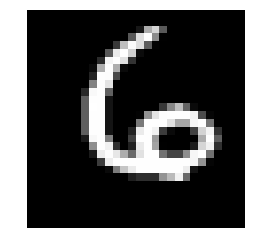

In [34]:
img_name = range.choice(train.filename)
data_dir = os.path.join(root_dir, '8th-sem-project/TensorFlow/data')
filepath = os.path.join(data_dir, 'Train', 'Images', 'train', img_name)

img = imread(filepath, flatten=True)

pylab.imshow(img, cmap='gray')
pylab.axis('off')
pylab.show()

The above image is represented when represented using numpy array:

In [37]:
img

array([[   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.],
       [   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.],
       [   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,   23.,  172.,  213.,   89.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.],
       [   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,   88.,  222.,  254.,  139.,    1.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.],
       [   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.

For the ease of data manipulation, I will store all the images in form of numpy arrays

In [2]:

temp = []
for img_name in train.filename:
    image_path = os.path.join(data_dir, 'Train', 'Images', 'train', img_name)
    img = imread(image_path, flatten=True)
    img = img.astype('float32')
    temp.append(img)
    
train_x = np.stack(temp)

temp = []
for img_name in test.filename:
    image_path = os.path.join(data_dir, 'Train', 'Images', 'test', img_name)
    img = imread(image_path, flatten=True)
    img = img.astype('float32')
    temp.append(img)
    
test_x = np.stack(temp)

NameError: name 'train' is not defined

I will now create a validation set and will take a split size of 70:30 for train set vs validation set

In [48]:
split_size=int(train_x.shape[0]*0.7)

train_x, val_x = train_x[:split_size], train_x[split_size:]
train_y, val_y = train.label.values[:split_size], train.label.values[split_size:]

In [1]:
#Defining a method that converts class label 

SyntaxError: invalid syntax (<ipython-input-1-f7de5b6b39e6>, line 1)